<a href="https://colab.research.google.com/github/RohanPalivela/W3BHackathon/blob/main/Wind_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload Kaggle API key
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mubashirrahim/wind-power-generation-data-forecasting

!mkdir -p /content/kaggle/input
!unzip wind-power-generation-data-forecasting.zip -d /content/kaggle/input

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting
License(s): CC0-1.0
  0% 0.00/3.32M [00:00<?, ?B/s]
100% 3.32M/3.32M [00:00<00:00, 82.4MB/s]
Archive:  wind-power-generation-data-forecasting.zip
  inflating: /content/kaggle/input/Location1.csv  
  inflating: /content/kaggle/input/Location2.csv  
  inflating: /content/kaggle/input/Location3.csv  
  inflating: /content/kaggle/input/Location4.csv  
  inflating: /content/kaggle/input/readme.txt  


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
data_1 = pd.read_csv('/content/kaggle/input/Location1.csv')
data_2 = pd.read_csv('/content/kaggle/input/Location2.csv')
data_3 = pd.read_csv('/content/kaggle/input/Location3.csv')
data_4 = pd.read_csv('/content/kaggle/input/Location4.csv')

# Checking Dataset Correlation

In [236]:
# Dataset 1
corr_table1 = round(data_1[['Power', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m']].corr(method = 'pearson'), 2)
corr_table1

,Power,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
Power,1.00,-0.21,-0.07,-0.22,0.73,0.78,0.16,0.17,0.66
temperature_2m,-0.21,1.00,-0.14,0.93,-0.11,-0.17,-0.15,-0.15,-0.01
relativehumidity_2m,-0.07,-0.14,1.00,0.22,-0.22,-0.05,-0.08,-0.09,-0.34
dewpoint_2m,-0.22,0.93,0.22,1.00,-0.19,-0.18,-0.18,-0.18,-0.13
windspeed_10m,0.73,-0.11,-0.22,-0.19,1.00,0.93,0.17,0.18,0.94
windspeed_100m,0.78,-0.17,-0.05,-0.18,0.93,1.00,0.16,0.18,0.82
winddirection_10m,0.16,-0.15,-0.08,-0.18,0.17,0.16,1.00,0.90,0.16
winddirection_100m,0.17,-0.15,-0.09,-0.18,0.18,0.18,0.90,1.00,0.17
windgusts_10m,0.66,-0.01,-0.34,-0.13,0.94,0.82,0.16,0.17,1.00


In [101]:
# Dataset 2
corr_table2 = round(data_2[['Power', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m']].corr(method = 'pearson'), 2)
corr_table2

,Power,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
Power,1.00,-0.13,-0.03,-0.14,0.61,0.63,0.18,0.20,0.58
temperature_2m,-0.13,1.00,-0.34,0.95,-0.17,-0.18,-0.16,-0.16,-0.04
relativehumidity_2m,-0.03,-0.34,1.00,-0.03,-0.07,0.01,-0.08,-0.10,-0.21
dewpoint_2m,-0.14,0.95,-0.03,1.00,-0.20,-0.18,-0.20,-0.20,-0.11
windspeed_10m,0.61,-0.17,-0.07,-0.20,1.00,0.94,0.20,0.22,0.94
windspeed_100m,0.63,-0.18,0.01,-0.18,0.94,1.00,0.21,0.24,0.85
winddirection_10m,0.18,-0.16,-0.08,-0.20,0.20,0.21,1.00,0.90,0.19
winddirection_100m,0.20,-0.16,-0.10,-0.20,0.22,0.24,0.90,1.00,0.22
windgusts_10m,0.58,-0.04,-0.21,-0.11,0.94,0.85,0.19,0.22,1.00


In [102]:
# Dataset 3
corr_table3 = round(data_3[['Power', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m']].corr(method = 'pearson'), 2)
corr_table3

,Power,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
Power,1.00,-0.16,-0.01,-0.16,0.50,0.56,0.10,0.11,0.45
temperature_2m,-0.16,1.00,-0.12,0.94,-0.03,-0.09,-0.14,-0.14,0.06
relativehumidity_2m,-0.01,-0.12,1.00,0.22,-0.18,-0.05,-0.14,-0.14,-0.28
dewpoint_2m,-0.16,0.94,0.22,1.00,-0.09,-0.10,-0.18,-0.18,-0.03
windspeed_10m,0.50,-0.03,-0.18,-0.09,1.00,0.92,0.13,0.13,0.94
windspeed_100m,0.56,-0.09,-0.05,-0.10,0.92,1.00,0.12,0.13,0.82
winddirection_10m,0.10,-0.14,-0.14,-0.18,0.13,0.12,1.00,0.92,0.13
winddirection_100m,0.11,-0.14,-0.14,-0.18,0.13,0.13,0.92,1.00,0.13
windgusts_10m,0.45,0.06,-0.28,-0.03,0.94,0.82,0.13,0.13,1.00


In [237]:
# Dataset 4
corr_table4 = round(data_4[['Power', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m']].corr(method = 'pearson'), 2)
corr_table4

,Power,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
Power,1.00,-0.15,-0.07,-0.17,0.80,0.82,0.10,0.10,0.74
temperature_2m,-0.15,1.00,-0.10,0.95,-0.06,-0.12,-0.14,-0.14,0.06
relativehumidity_2m,-0.07,-0.10,1.00,0.22,-0.15,-0.00,-0.14,-0.13,-0.24
dewpoint_2m,-0.17,0.95,0.22,1.00,-0.10,-0.12,-0.18,-0.18,-0.02
windspeed_10m,0.80,-0.06,-0.15,-0.10,1.00,0.93,0.07,0.06,0.94
windspeed_100m,0.82,-0.12,-0.00,-0.12,0.93,1.00,0.08,0.07,0.82
winddirection_10m,0.10,-0.14,-0.14,-0.18,0.07,0.08,1.00,0.93,0.07
winddirection_100m,0.10,-0.14,-0.13,-0.18,0.06,0.07,0.93,1.00,0.06
windgusts_10m,0.74,0.06,-0.24,-0.02,0.94,0.82,0.07,0.06,1.00


# Cleaning + Combining Data

In [238]:
data_4 = data_4.dropna()

data_4 = data_4.drop(columns=['Time','windgusts_10m','windspeed_10m','winddirection_10m','dewpoint_2m'])
data_4

#'windgusts_10m','windspeed_10m','winddirection_10m','dewpoint_2m'
# We originally tried to combine the data, but correlation to power wasn't best, so: combined_data= pd.concat([data_1, data_2, data_3, data_4], ignore_index=True)

,temperature_2m,relativehumidity_2m,windspeed_100m,winddirection_100m,Power
0,22.7,82,7.60,90,0.3047
1,22.0,82,7.92,94,0.3516
2,21.7,82,8.41,93,0.3985
3,21.7,85,8.26,97,0.4454
4,22.4,88,8.50,91,0.4922
...,...,...,...,...,...
43795,25.5,94,6.66,8,0.3417
43796,25.3,92,7.52,5,0.3342
43797,24.9,90,7.57,8,0.3267
43798,24.9,89,7.44,6,0.3192


In [239]:
y = data_4['Power']
X = data_4.drop(columns=['Power'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [240]:
print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (43800, 4)
y.shape (43800,)


In [241]:
data_4.head()

,temperature_2m,relativehumidity_2m,windspeed_100m,winddirection_100m,Power
0,22.7,82,7.60,90,0.3047
1,22.0,82,7.92,94,0.3516
2,21.7,82,8.41,93,0.3985
3,21.7,85,8.26,97,0.4454
4,22.4,88,8.50,91,0.4922


# Testing Different Sklearn models

In [242]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
# Train PLS Regression Model
pls = PLSRegression(n_components=4)
pls.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = pls.predict(X_test)
y_pred2 = pls.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.13012040724570362
R²: 0.6712461023054808


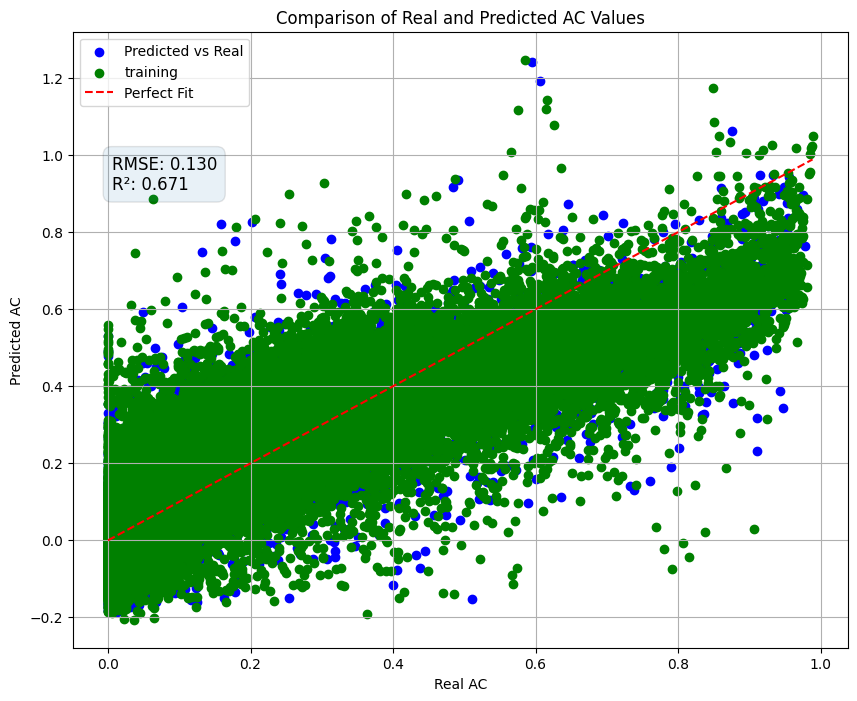

In [243]:
# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real')
plt.scatter(y_train, y_pred2, color='green', label='training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')
plt.text(x=0.05, y=0.8, s=f'RMSE: {rmse:.3f}\nR²: {r2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1))

plt.xlabel('Real AC')
plt.ylabel('Predicted AC')
plt.title('Comparison of Real and Predicted AC Values')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('R square:', lr_model.score(X_test, y_test))

R square: 0.6712461023054808


In [245]:
prediction = lr_model.predict(X_test)

In [246]:
pred_df = pd.DataFrame({"Value": y_test, "Pred": prediction})
pred_df.head()

,Value,Pred
16503,0.4194,0.472318
43029,0.2741,0.187148
28593,0.2831,0.116946
5053,0.0294,-0.024810
20414,0.0266,-0.162243


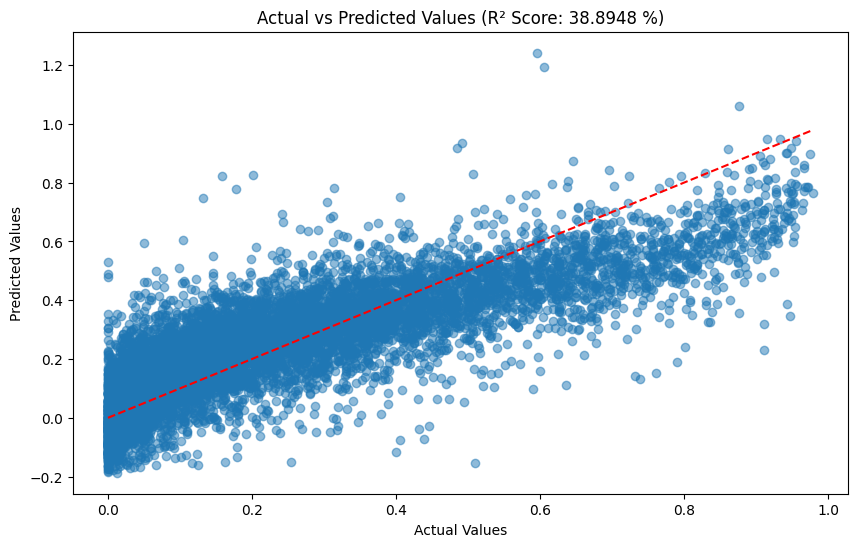

In [247]:
# Assuming you have already trained your Linear Regression model and have your predictions
y_pred = lr_model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R² Score: {lr_score*100:.4f} %)')
plt.show()


In [249]:
from sklearn import neighbors

score_list = []
n_neighbors_list = []

# for loop to find best fitting n_neighbor value
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Best n_neighbor at {best_n_neighbor} with {max(score_list)*100:.4f} %")

Best n_neighbor at 5 with 62.5771 %


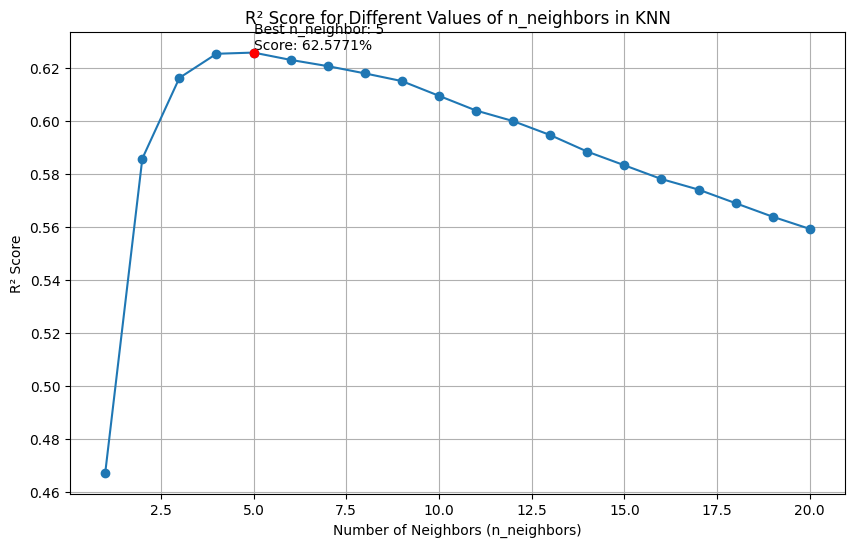

Best n_neighbor at 5 with 62.5771 %


In [250]:
import matplotlib.pyplot as plt

# Assuming you have run the loop and have your score_list and n_neighbors_list
# Plot the scores against the number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, score_list, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('R² Score')
plt.title('R² Score for Different Values of n_neighbors in KNN')
plt.grid(True)

# Highlight the best n_neighbors
best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
best_score = max(score_list)
plt.scatter([best_n_neighbor], [best_score], color='red', zorder=5)
plt.text(best_n_neighbor, best_score, f'Best n_neighbor: {best_n_neighbor}\nScore: {best_score*100:.4f}%',
         horizontalalignment='left', verticalalignment='bottom')

plt.show()

print(f"Best n_neighbor at {best_n_neighbor} with {best_score*100:.4f} %")

In [251]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

Score is 50.6676 %


In [252]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

rfr_score = model.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")

Score is 73.6672 %


In [222]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

base_models = [
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor())
]
meta_model = LinearRegression()



stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

rfr_score = stacking_model.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")

Score is 76.5154 %


In [223]:
from joblib import dump, load
dump(stacking_model, 'model.joblib')

['model.joblib']

In [224]:
files.download('model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.1, 0.05]
}

grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_score = best_model.score(X_test, y_test)
print(f"Best Score is {best_score * 100:.4f} %")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END gb__learning_rate=0.1, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=100; total time=  53.2s
[CV] END gb__learning_rate=0.1, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=100; total time=  46.5s
[CV] END gb__learning_rate=0.1, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=100; total time=  47.2s
[CV] END gb__learning_rate=0.1, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=100; total time=  46.7s
[CV] END gb__learning_rate=0.1, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=100; total time=  45.7s
[CV] END gb__learning_rate=0.1, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=200; total time= 1.3min
[CV] END gb__learning_rate=0.1, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=200; total time= 1.3min
[CV] END gb__learning_rate=0.1, gb__n_estimators=100, rf__max_depth=10, rf__n_estimators=200; total time= 1.3min
[CV] END gb__learning_rate=0.1, gb_

In [157]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
model.fit(X_train, y_train)

rfr_score = model.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")

Score is 57.5458 %


In [255]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=4, bootstrap=True)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")

Score is 74.3938 %


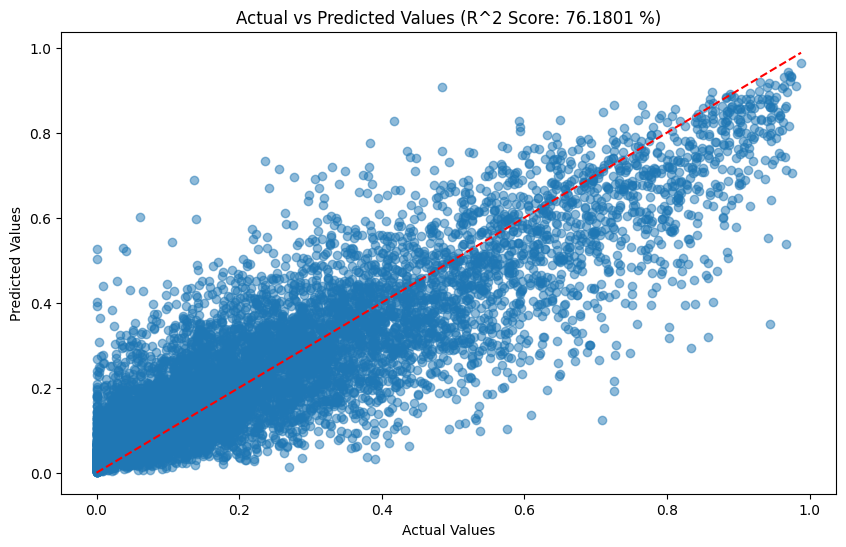

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your RandomForestRegressor and have your predictions
y_pred = rfr.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of best fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R^2 Score: {rfr_score*100:.4f} %)')
plt.show()

# Model with Tensorflow
I don't know any tensorflow lol, had to watch a Yt tutorial for this

In [171]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer
from keras.optimizers import Adam
from keras.losses import mean_absolute_error

In [209]:
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'data'
features = ['temperature_2m', 'relativehumidity_2m', 'windspeed_100m', 'winddirection_100m']
target = 'Power'

# Separate features and target
X_tensorflow = data_4[features].values
y_tensorflow = data_4[target].values

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your features and transform
X_normalized = scaler.fit_transform(X_tensorflow)

# Reshape for LSTM input (assuming 1 time step)
X_normalized = X_normalized.reshape(X_normalized.shape[0], 1, X_normalized.shape[1])

# If you want to normalize the target as well (optional, but can be helpful)
# y_scaler = StandardScaler()
# y_normalized = y_scaler.fit_transform(y_tensorflow.reshape(-1, 1))

# Now you can use X_normalized and y_normalized to train your model

In [210]:
train_idx=int(len(X_normalized)*0.8)
val_idx=int(len(X_normalized)*0.9)

X_train_t,y_train_t=X_normalized[:train_idx] ,y[:train_idx]
X_val,y_val=X_normalized[train_idx:val_idx], y[train_idx:val_idx]
X_test_t,y_test_t=X_normalized[val_idx:], y[val_idx:]

X_train_t=X_train_t.reshape(X_train_t.shape[0], X_train_t.shape[1], -1)
X_val=X_val.reshape(X_val.shape[0], X_val.shape[1], -1)
X_test_t=X_test_t.reshape(X_test_t.shape[0], X_test_t.shape[1], -1)

X_train_t.shape, y_train_t.shape, X_val.shape, y_val.shape, X_test_t.shape, y_test_t.shape

((35040, 1, 4), (35040,), (4380, 1, 4), (4380,), (4380, 1, 4), (4380,))

In [213]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(1,4)))
model.add(Dense(units=1))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                17664     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17729 (69.25 KB)
Trainable params: 17729 (69.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [214]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_t, y_train_t, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
548/548 [==============================] - 9s 5ms/step - loss: 0.0210 - mae: 0.1001 - val_loss: 0.0193 - val_mae: 0.1016
Epoch 2/100
548/548 [==============================] - 2s 3ms/step - loss: 0.0145 - mae: 0.0877 - val_loss: 0.0190 - val_mae: 0.0999
Epoch 3/100
548/548 [==============================] - 2s 3ms/step - loss: 0.0143 - mae: 0.0868 - val_loss: 0.0190 - val_mae: 0.0997
Epoch 4/100
548/548 [==============================] - 2s 3ms/step - loss: 0.0141 - mae: 0.0860 - val_loss: 0.0185 - val_mae: 0.0977
Epoch 5/100
548/548 [==============================] - 2s 3ms/step - loss: 0.0140 - mae: 0.0856 - val_loss: 0.0183 - val_mae: 0.0976
Epoch 6/100
548/548 [==============================] - 2s 4ms/step - loss: 0.0140 - mae: 0.0855 - val_loss: 0.0182 - val_mae: 0.0975
Epoch 7/100
548/548 [==============================] - 2s 3ms/step - loss: 0.0139 - mae: 0.0854 - val_loss: 0.0181 - val_mae: 0.0963
Epoch 8/100
548/548 [==============================] - 2s 3ms/step - 

In [215]:
X_test_array = X_test.to_numpy()
X_test_array=X_test_array.reshape(X_test.shape[0], X_test.shape[1], -1)

In [217]:
test_loss, test_mae = model.evaluate(X_test_t, y_test_t)
print(f"Test MAE: {test_mae}")

137/137 [==============================] - 0s 3ms/step - loss: 0.0115 - mae: 0.0766
Test MAE: 0.07664615660905838


In [220]:
prediction_t = model.predict(X_test_t)

# Flatten the predicted values
prediction_t_flat = prediction_t.flatten()

# Create the DataFrame
pred_df = pd.DataFrame({"Value": y_test_t, "Pred": prediction_t_flat})

# Display the head of the DataFrame
pred_df.head()

137/137 [==============================] - 0s 3ms/step


,Value,Pred
39420,0.0165,0.030888
39421,0.0135,0.032861
39422,0.0105,0.035188
39423,0.0075,0.023658
39424,0.0045,0.022243


from matplotlib import pyplot as plt
_df_12['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Pred'].plot(kind='hist', bins=20, title='Pred')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='Value', y='Pred', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Pred'].plot(kind='line', figsize=(8, 4), title='Pred')
plt.gca().spines[['top', 'right']].set_visible(False)

In [221]:
r2 = r2_score(y_test_t, prediction_t_flat)
print(f'R-squared (R²): {r2}')


R-squared (R²): 0.7091082310187772


In [ ]:
X_train_array = X_train.to_numpy()

X_train_array = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], -1)

X_train_array.shape

# before scaling: Test MAE: 0.08391834050416946